In [242]:
import pandas as pd
import cv2
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.image as mpimg
from gtts import gTTS
import os
import IPython.display as ip
%matplotlib inline

In [243]:
df = pd.read_csv('colors.csv')
df.columns = ['color_code','color_name','hex_value','r_value','g_value','b_value']
df.shape

(864, 6)

In [244]:
df.head(10)

,color_code,color_name,hex_value,r_value,g_value,b_value
0,air_force_blue_usaf,Air Force Blue (Usaf),#00308f,0,48,143
1,air_superiority_blue,Air Superiority Blue,#72a0c1,114,160,193
2,alabama_crimson,Alabama Crimson,#a32638,163,38,56
3,alice_blue,Alice Blue,#f0f8ff,240,248,255
4,alizarin_crimson,Alizarin Crimson,#e32636,227,38,54
5,alloy_orange,Alloy Orange,#c46210,196,98,16
6,almond,Almond,#efdecd,239,222,205
7,amaranth,Amaranth,#e52b50,229,43,80
8,amber,Amber,#ffbf00,255,191,0
9,amber_sae_ece,Amber (Sae/Ece),#ff7e00,255,126,0


In [245]:
df[df.columns[1:]][:6]

,color_name,hex_value,r_value,g_value,b_value
0,Air Force Blue (Usaf),#00308f,0,48,143
1,Air Superiority Blue,#72a0c1,114,160,193
2,Alabama Crimson,#a32638,163,38,56
3,Alice Blue,#f0f8ff,240,248,255
4,Alizarin Crimson,#e32636,227,38,54
5,Alloy Orange,#c46210,196,98,16


In [246]:
img = cv2.imread('images.jpeg')

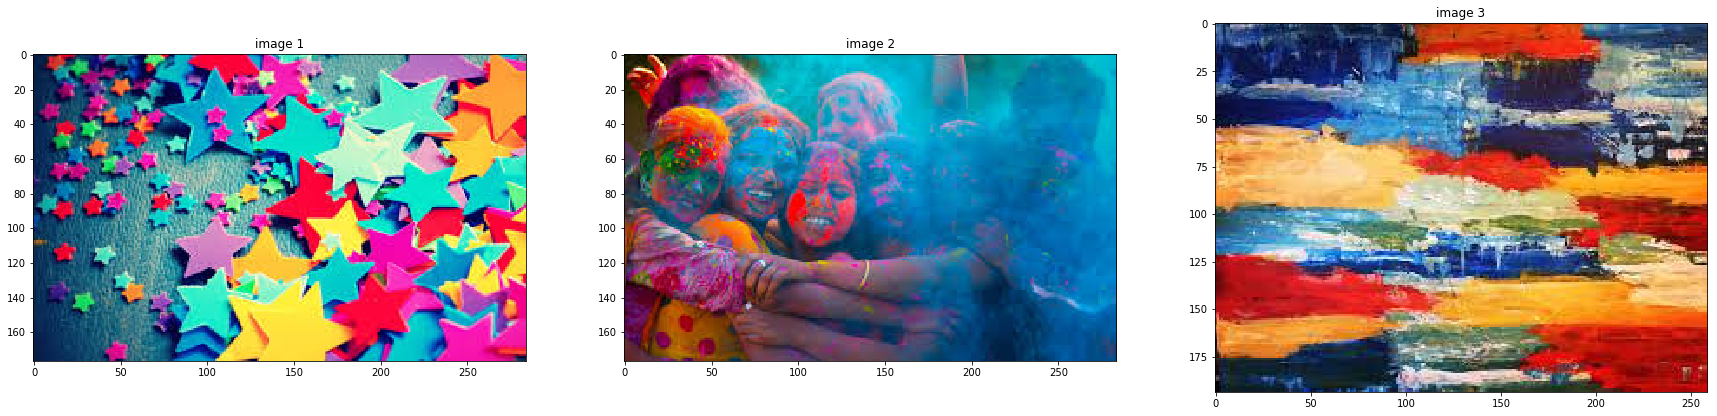

In [247]:
fig, (axs1, axs2, axs3) = plt.subplots(1,3, figsize=(30,30))
image_1 = mpimg.imread('images.jpeg')
axs1.set_title('image 1')
axs1.imshow(image_1)
image_2 = mpimg.imread('images (1).jpeg')
axs2.set_title('image 2')
axs2.imshow(image_2)
image_3 = mpimg.imread('images (2).jpeg')
axs3.set_title('image 3')
axs3.imshow(image_3)


In [248]:
clicked = False
r=g=b=xpos=ypos=0

In [249]:
def getColorName(R,G,B):
    minimum = 10000
    for i in range(len(df)):
        d = abs(R- int(df.loc[i,"r_value"])) + abs(G- int(df.loc[i,"g_value"]))+ abs(B- int(df.loc[i,"b_value"]))
        if(d<=minimum):
            minimum = d
            cname = df.loc[i,"color_name"]
    return cname

In [250]:
def draw_function(event, x,y,flags,param):
    if event == cv2.EVENT_LBUTTONDBLCLK:
        global b,g,r,xpos,ypos, clicked
        clicked = True
        xpos = x
        ypos = y
        b,g,r = img[y,x]
        b = int(b)
        g = int(g)
        r = int(r)

In [257]:
cv2.namedWindow('image',cv2.WINDOW_NORMAL)
cv2. resizeWindow('image', 1080,1080)
cv2.setMouseCallback('image',draw_function)

while(1):
    cv2.imshow("image",img)
    if (clicked):
        #cv2.rectangle(image, startpoint, endpoint, color, thickness) -1 thickness fills rectangle entirely
        cv2.rectangle(img,(5,5), (750,60), (b,g,r), -1)
        #Creating text string to display ( Color name and RGB values )
        text = getColorName(r,g,b) + ' Red='+ str(r) + ' Green='+ str(g) + ' Blue='+ str(b)
        #cv2.putText(img,text,start,font(0-7), fontScale, color, thickness, lineType, (optional bottomLeft bool) )
        cv2.putText(img, text,(10,40),cv2.FONT_HERSHEY_PLAIN,0.7,(255,255,255),1,cv2.LINE_AA)
        print(text)
        myobj = gTTS(text=getColorName(r,g,b), lang='en', slow=False)
        myobj.save("welcome.mp3") 
        
        #For very light colours we will display text in black colour
        if(r+g+b>=600):
            cv2.putText(img, text,(10,40),cv2.FONT_HERSHEY_PLAIN,0.7,(0,0,0),1,cv2.LINE_AA)
        
        clicked=False
    #Break the loop when user hits 'esc' key 
    if cv2.waitKey(20) & 0xFF ==27:
        break
cv2.destroyAllWindows()
ip.Audio('welcome.mp3')

Carmine Red Red=255 Green=2 Blue=58
